In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
from PIL import Image
import matplotlib.pyplot as plt
import glob,os,cv2
from imgaug import augmenters as iaa
from skimage.filters import gaussian, unsharp_mask



tec = [None]*10
#conv
tec[0] = iaa.EdgeDetect(alpha=(0.1))
tec[1] = iaa.Sharpen(alpha=(0.5), lightness=(1.5))
tec[2] = iaa.MultiplyHueAndSaturation((1.0), per_channel=True)
tec[3] = iaa.Emboss(alpha=(0.0, 1.0), strength=(0.5, 1.5))

#
tec[4] = iaa.Invert(0.50)

#contrast

tec[5] = iaa.GammaContrast((1.0, 1.25))
tec[6] = iaa.SigmoidContrast(gain=(3, 10), cutoff=(0.4, 0.6))
tec[7] = iaa.HistogramEqualization()
tec[8] = iaa.LinearContrast((0.4, 1.6))
tec[9] = iaa.GaussianBlur(sigma=(0.5, 0.5)) # main gaussian used 0.6

img = cv2.imread("/content/drive/MyDrive/png/04_LYMPHO/image_10.png")

(-0.5, 149.5, 149.5, -0.5)

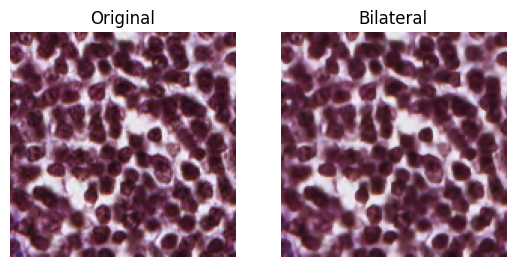

In [17]:
bilateral = cv2.bilateralFilter(img,3,90,90)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(bilateral)
plt.title("Bilateral")
plt.axis('off')

(-0.5, 149.5, 149.5, -0.5)

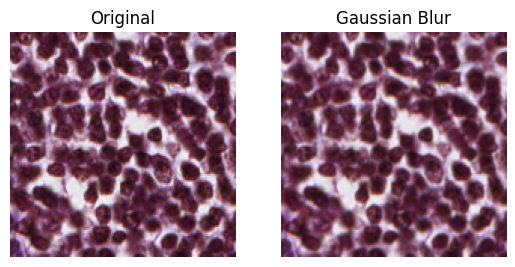

In [18]:
Gaussian = tec[9].augment_image(img)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(Gaussian)
plt.title("Gaussian Blur")
plt.axis('off')

(-0.5, 149.5, 149.5, -0.5)

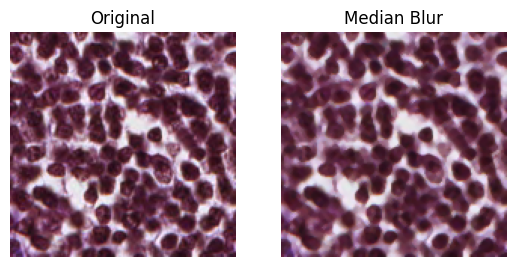

In [19]:
median = cv2.medianBlur(img,3)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(median)
plt.title("Median Blur")
plt.axis('off')

(-0.5, 149.5, 149.5, -0.5)

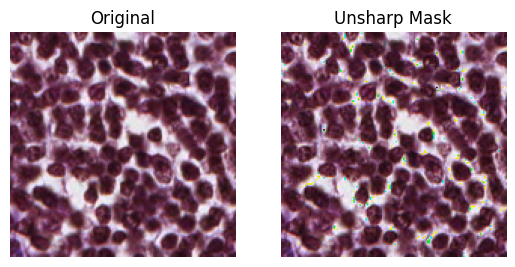

In [20]:
im = (img - Gaussian)*1
unsharp = img+im

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(unsharp)
plt.title("Unsharp Mask")
plt.axis('off')

(-0.5, 149.5, 149.5, -0.5)

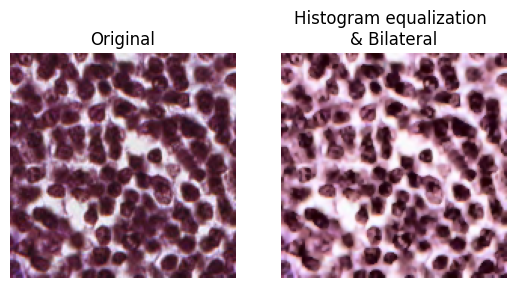

In [21]:
tm = tec[7].augment_image(img)
his_bi = cv2.bilateralFilter(tm,3,90,90)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(his_bi)
plt.title("Histogram equalization \n& Bilateral")
plt.axis('off')

(-0.5, 149.5, 149.5, -0.5)

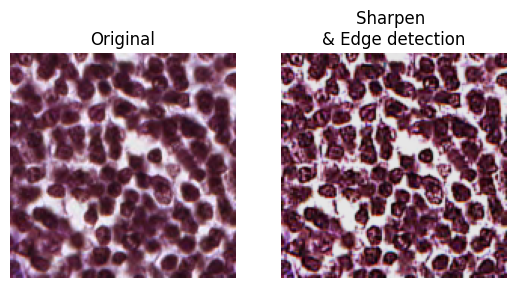

In [22]:
tm = tec[1].augment_image(img)
shar_edge = tec[0].augment_image(tm)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(shar_edge)
plt.title("Sharpen \n& Edge detection")
plt.axis('off')

(-0.5, 149.5, 149.5, -0.5)

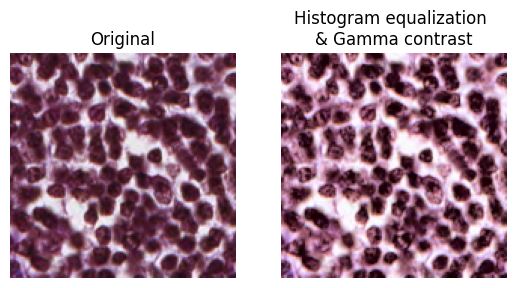

In [23]:
tm = tec[7].augment_image(img)
his_gamma = tec[5].augment_image(tm)

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(his_gamma)
plt.title("Histogram equalization \n& Gamma contrast")
plt.axis('off')